In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
# nltk.download('punkt')
import string
from numpy.random import default_rng

In [38]:
"""
This is version 2 of the implementation of the Cognitive Behaviour Therapy (CBT) chatbot to detect
the sentiment of the user input and categorize them into emotions such as happy, angry, sad etc.
The main focus of the chatbot however, is to detect hints of sadness in the sentence which would
then prompt for further actions such as calling emergency services, asking further questions as
to why they feel sad for example and examples of why they shouldn't, in the effort to help individuals 
to regulate their emotions by considering the other perspective which is that of a more neutral/positive 
one that they can think of. This portion mainly focuses on the detection of said emotions.
"""

"\nThis is version 2 of the implementation of the Cognitive Behaviour Therapy (CBT) chatbot to detect\nthe sentiment of the user input and categorize them into emotions such as happy, angry, sad etc.\nThe main focus of the chatbot however, is to detect hints of sadness in the sentence which would\nthen prompt for further actions such as calling emergency services, asking further questions as\nto why they feel sad for example and examples of why they shouldn't, in the effort to help individuals \nto regulate their emotions by considering the other perspective which is that of a more neutral/positive \none that they can think of. This portion mainly focuses on the detection of said emotions.\n"

In [39]:
# Importing and reading data (training set part 1)
df_train_original = pd.read_table('train.txt',names=['text','Sentiment'],sep=';',encoding='utf-8')
df_train_original

,text,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger
...,...,...
15995,i just had a very brief time in the beanbag an...,sadness
15996,i am now turning and i feel pathetic that i am...,sadness
15997,i feel strong and good overall,joy
15998,i feel like this was such a rude comment and i...,anger


In [40]:
# Importing and reading data (training set part 2)

df_2_original = pd.read_csv("emotion_dataset_raw.csv")
df_2_original

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...
34788,joy,The world didnt give it to me..so the world MO...
34789,anger,A man robbed me today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO..."


In [41]:
# Renaming training set 2 to the same headings as set 1 to prepare for merging

df2_changeheading = df_2_original.copy()
df2_changeheading = df2_changeheading.rename(columns = {"Emotion": "Sentiment", "Text": "text"})

In [42]:
# Training set 2 after change
df2_changeheading

,Sentiment,text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...
34788,joy,The world didnt give it to me..so the world MO...
34789,anger,A man robbed me today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO..."


In [43]:
# Merging of training set 1 and 2 via column headings

df_merged = pd.concat([df2_changeheading, df_train_original], axis=0)

In [44]:
# Getting all unique sentiments

df_merged["Sentiment"].unique()

array(['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame',
       'disgust', 'love'], dtype=object)

In [45]:
# checking for all records of a particular sentiment

df_merged[df_merged["Sentiment"] == "surprise"]

,Sentiment,text
7,surprise,maken Tip 2: Stop op een moment dat je het hel...
8,surprise,En dan krijg je ff een cadeautje van een tweep...
9,surprise,@1116am Drummer Boy bij op verzoek van @BiemO...
16,surprise,Haha of course I come home to a different hous...
19,surprise,@JuliaLeader I reeeeeellllyyyyyyy need to tell...
...,...,...
15871,surprise,i spent a lot of time feeling a bit stunned th...
15943,surprise,i believe the most readers feel impressed by t...
15970,surprise,i have to admit im feeling pretty overwhelmed
15974,surprise,i am feeling much like the guy in the pic abov...


In [46]:
# Step 1: Remove all rows with non-english texts
display(df_merged[df_merged['text'].map(lambda x: x.isascii())])

# Saving file for future uses
df_merged = df_merged[df_merged['text'].map(lambda x: x.isascii())]
display(df_merged)
df_merged.to_csv("df_merged.csv")

,Sentiment,text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
...,...,...
15995,sadness,i just had a very brief time in the beanbag an...
15996,sadness,i am now turning and i feel pathetic that i am...
15997,joy,i feel strong and good overall
15998,anger,i feel like this was such a rude comment and i...


,Sentiment,text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
...,...,...
15995,sadness,i just had a very brief time in the beanbag an...
15996,sadness,i am now turning and i feel pathetic that i am...
15997,joy,i feel strong and good overall
15998,anger,i feel like this was such a rude comment and i...


In [47]:
# Set default visualizing library to seaborn
sns.set()

<AxesSubplot: xlabel='Sentiment', ylabel='count'>

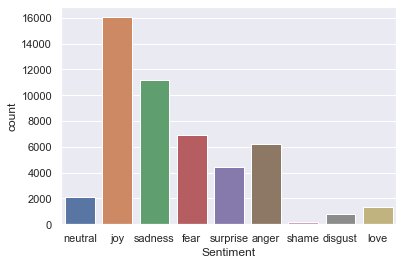

In [48]:
# Visualizing distribution of curve 
sns.countplot(x = df_merged["Sentiment"])

In [49]:
df = df_merged[df_merged['Sentiment'].isin(['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger'])]
df

,Sentiment,text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...
...,...,...
15995,sadness,i just had a very brief time in the beanbag an...
15996,sadness,i am now turning and i feel pathetic that i am...
15997,joy,i feel strong and good overall
15998,anger,i feel like this was such a rude comment and i...


In [50]:
# randomly grab rows specified in arg
df_merged.sample(4)

,Sentiment,text
19739,sadness,your ass makes a g-string stand for granny pan...
11941,sadness,i feel a bit foolish now
14942,anger,is voice as usual is perfect but is like you k...
34098,sadness,Misbah you couldnt resist could you?! You had ...


In [51]:
df_merged[df_merged["Sentiment"] == "joy"].sample(10000)

,Sentiment,text
7085,joy,i still left the studio feeling pretty mellow ...
26552,joy,Off to a second thanksgiving. atleast its fami...
13582,joy,Ballet first period tomorrow
23161,joy,Eighteen.Some friends are having a birthday p...
20950,joy,"We act cool , like we 're not delighted to mee..."
...,...,...
8412,joy,When my sister - after a history of one aborti...
16050,joy,We are very happy that the Volkswagen Tour has...
11872,joy,i still feel i have a very long way to go befo...
6489,joy,"Lots of reasons 2worry, b mad, b sad but these..."


In [52]:
arr_indices_top_drop = default_rng().choice(df_merged[df_merged["Sentiment"] == "joy"].index, size=10000) #, replace=False)
df_cut = df_merged.drop(index=arr_indices_top_drop)

<AxesSubplot: xlabel='Sentiment', ylabel='count'>

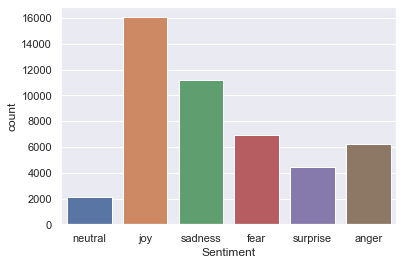

In [53]:
df_cut = df # removed last 3 sentiments
sns.countplot(x = df_cut["Sentiment"])

In [54]:
stopwords = nltk.corpus.stopwords.words('english')
punct = string.punctuation

In [55]:
def remove_punctuation(x):
    '''
    Remove punctuation from a string
    '''
    tokenized_x = nltk.tokenize.word_tokenize(x) # get a list of all the words
    return [i for i in tokenized_x if i not in punct] # remove any punctuations in the list

In [56]:
def remove_stopwords(x):
    '''
    Remove stopwords from a string
    '''
    for i in x:
        if i in stopwords:
            x.remove(i) # remove stopwords
    return x

In [57]:
df_train_remstop = df_cut.loc[:, 'text'].apply(remove_punctuation) # removing punctuation
df_train_remstop = df_train_remstop.apply(remove_stopwords) # removing stopwords
df_train_remstop

0                                                    [Why]
1             [Sage, Act, upgrade, my, do, list, tommorow]
2        [ON, THE, WAY, TO, MY, HOMEGIRL, BABY, FUNERAL...
3        [Such, eye, The, true, hazel, eye-and, brillia...
4        [Iluvmiasantos, ugh, babe, .., hugggzzz, u, ba...
                               ...                        
15995    [just, a, brief, time, the, beanbag, said, ann...
15996    [turning, i, feel, pathetic, i, am, still, wai...
15997                        [feel, strong, good, overall]
15998     [feel, like, was, a, rude, comment, im, glad, t]
15999        [know, lot, i, feel, stupid, i, not, portray]
Name: text, Length: 46916, dtype: object

In [58]:
df_train_tokenized = df_cut.copy()
df_train_tokenized['text'] = df_train_remstop
df_train_tokenized

,Sentiment,text
0,neutral,[Why]
1,joy,"[Sage, Act, upgrade, my, do, list, tommorow]"
2,sadness,"[ON, THE, WAY, TO, MY, HOMEGIRL, BABY, FUNERAL..."
3,joy,"[Such, eye, The, true, hazel, eye-and, brillia..."
4,joy,"[Iluvmiasantos, ugh, babe, .., hugggzzz, u, ba..."
...,...,...
15995,sadness,"[just, a, brief, time, the, beanbag, said, ann..."
15996,sadness,"[turning, i, feel, pathetic, i, am, still, wai..."
15997,joy,"[feel, strong, good, overall]"
15998,anger,"[feel, like, was, a, rude, comment, im, glad, t]"


In [59]:
from sklearn.feature_extraction.text import CountVectorizer

In [60]:
from sklearn.feature_extraction.text import TfidfTransformer

In [61]:
from sklearn.naive_bayes import MultinomialNB

In [62]:
from sklearn.pipeline import Pipeline

In [63]:
def text_processing(String):
    x = remove_punctuation(String)
    return remove_stopwords(x)

In [64]:
pipeline = Pipeline([ 
    ('bow', CountVectorizer(analyzer = text_processing)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [65]:
pipeline.fit(df_cut['text'], df_cut["Sentiment"])

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x0000023FF0E8D5E0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [66]:
df_test = pd.read_table('val.txt',names=['text','Sentiment'],sep=';',encoding='utf-8')
df_test = df_test[df_test['text'].map(lambda x: x.isascii())] # remove non-english texts if found
df_test = df_test[df_test['Sentiment'].isin(['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger'])]
df_test

,text,Sentiment
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy
5,i start to feel more appreciative of what god ...,joy
...,...,...
1995,im having ssa examination tomorrow in the morn...,sadness
1996,i constantly worry about their fight against n...,joy
1997,i feel its important to share this info for th...,joy
1998,i truly feel that if you are passionate enough...,joy


In [67]:
predictions_pipe = pipeline.predict(df_test['text'])
predictions_pipe

array(['sadness', 'sadness', 'anger', ..., 'joy', 'joy', 'joy'],
      dtype='<U8')

In [68]:
from sklearn.metrics import classification_report, confusion_matrix

In [69]:
print(classification_report(df_test["Sentiment"], predictions_pipe))

              precision    recall  f1-score   support

       anger       1.00      0.19      0.32       275
        fear       0.85      0.29      0.43       212
         joy       0.63      0.99      0.77       704
     sadness       0.77      0.84      0.80       550
    surprise       0.00      0.00      0.00        81

    accuracy                           0.70      1822
   macro avg       0.65      0.46      0.46      1822
weighted avg       0.73      0.70      0.64      1822



C:\Users\YongQing\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\YongQing\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\YongQing\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av